In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [5]:
local_df = pd.read_csv("../measurements/local_long/map.csv")
map_df = pd.read_csv("../measurements/real_bw_test/map.csv")
cha_df = pd.read_csv("../measurements/real_bw_test/characteristic.csv")
mag_df = pd.read_csv("../measurements/real_bw_test/manager.csv")

jpeg_map_df = pd.read_csv("../measurements/real_bw_test_15fps/map.csv")
jpeg_cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
jpeg_mag_df = pd.read_csv("../measurements/real_bw_test_15fps/manager.csv")

no_map_df = pd.read_csv("../measurements/real_bw_no_jpeg/map.csv")
no_cha_df = pd.read_csv("../measurements/real_bw_no_jpeg/characteristic.csv")
no_mag_df = pd.read_csv("../measurements/real_bw_no_jpeg/manager.csv")
# time_df = pd.read_csv("../measurements/real_bw_test/time.csv")
# static_map_df = pd.read_csv("../measurements/jpeg_no_change/map.csv")
# static_cha_df = pd.read_csv("../measurements/jpeg_no_change/characteristic.csv")

In [6]:
map_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,feasible,sensitivity,map
0,0.00,60,1,6000000.0,0.3,1,-1,0.500000,0.500000
1,0.15,1,2,6000000.0,0.3,2,-1,0.666667,0.416667
2,0.05,100,1,6000000.0,0.3,3,-1,1.000000,0.750000
3,0.00,90,1,6000000.0,0.3,4,-1,0.800000,0.558333
4,0.00,3,2,6000000.0,0.3,5,-1,0.800000,0.750000


In [7]:
quality_level = []

for q in map_df["quality"]:
    if q>50:
        quality_level.append((q-50)/10)
    else:
        quality_level.append(q)

map_df["quality_level"] = quality_level


# mAP drop

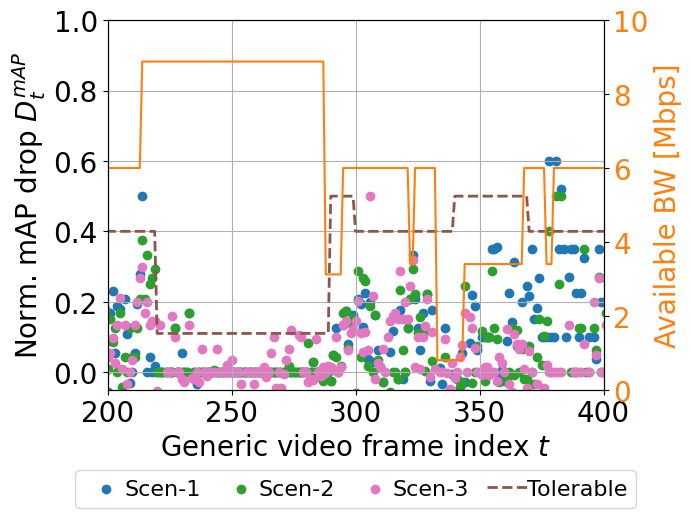

In [8]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Norm. mAP drop $D^{mAP}_t$')
# ax1.tick_params(axis='y')

ax1.scatter(map_df["frame_id"].to_numpy(),local_df["map"].to_numpy() - jpeg_map_df["map"].to_numpy(),label="Scen-1", color="tab:blue")
ax1.scatter(map_df["frame_id"].to_numpy(),local_df["map"].to_numpy() - map_df["map"].to_numpy(),label="Scen-2", color="tab:green")
ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["map"].to_numpy() - no_map_df["map"].to_numpy())*0.8,label="Scen-3", color="tab:pink")



ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy(), linestyle='--', linewidth=2,color="tab:brown",label="Tolerable" )
# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([-0.05,1])
ax2.set_ylim([0,10])
ax1.grid()
ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=16, columnspacing=0.8,handletextpad=-0.2)
# plt.autoscale(axis="x",tight=True)
# plt.savefig("../figures/map_drop.pdf", bbox_inches='tight')

In [16]:
temp= (local_df["map"].to_numpy() - jpeg_map_df["map"].to_numpy()) - map_df["drop"].to_numpy()
temp = temp[200:]
len(temp[temp>0])/len(temp)

0.032

In [17]:
temp= (local_df["map"].to_numpy() - map_df["map"].to_numpy()) - map_df["drop"].to_numpy()
temp = temp[200:]
len(temp[temp>0])/len(temp)

0.016

In [18]:
temp= (local_df["map"].to_numpy() - no_map_df["map"].to_numpy()) - map_df["drop"].to_numpy()
temp = temp[200:]
len(temp[temp>0])/len(temp)

0.048

In [9]:
# temp  = local_df["map"].to_numpy() - static_map_df["map"].to_numpy()

# temp.std()

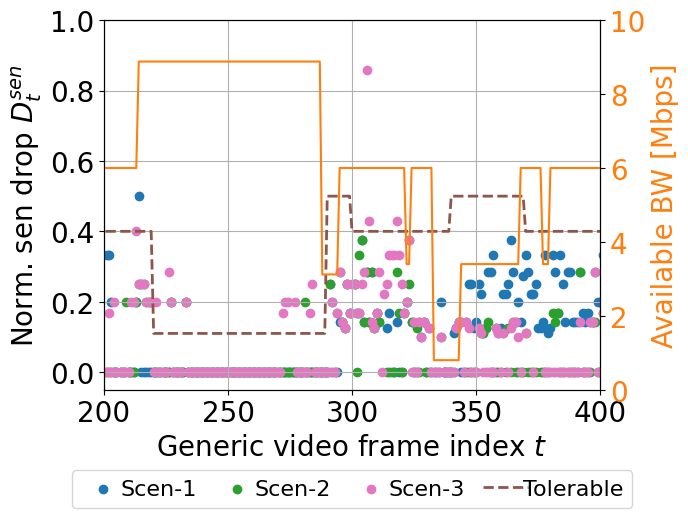

In [10]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Norm. sen drop $D^{sen}_t$')
# ax1.tick_params(axis='y', labelcolor=color)

ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - jpeg_map_df["sensitivity"].to_numpy()),label="Scen-1", color= "tab:blue")
ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()),label="Scen-2", color= "tab:green")
ax1.scatter(map_df["frame_id"].to_numpy(),(local_df["sensitivity"].to_numpy() - no_map_df["sensitivity"].to_numpy()),label="Scen-3", color= "tab:pink")

# plt.axhline(y=10, color='tab:brown', linestyle='--', linewidth=2,label="Tolerable")
ax1.plot(map_df["frame_id"].to_numpy(),map_df["drop"].to_numpy(), linestyle='--', linewidth=2,color="tab:brown",label="Tolerable" )

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax1.set_xlim([200, 400])
ax1.set_ylim([-0.05,1])
ax2.set_ylim([0,10])
ax1.grid()
ax1.legend(ncol=4,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=16,columnspacing=0.8,handletextpad=-0.2)
# plt.autoscale(axis="x",tight=True)
# plt.savefig("../figures/sen_drop.pdf", bbox_inches='tight')

In [13]:
temp= (local_df["sensitivity"].to_numpy() - jpeg_map_df["sensitivity"].to_numpy()) - map_df["drop"].to_numpy()
temp = temp[200:]
len(temp[temp>0])/len(temp)

0.016

In [14]:
temp= (local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()) - map_df["drop"].to_numpy()
temp = temp[200:]
len(temp[temp>0])/len(temp)

0.012

In [15]:
temp= (local_df["sensitivity"].to_numpy() - no_map_df["sensitivity"].to_numpy()) - map_df["drop"].to_numpy()
temp = temp[200:]
len(temp[temp>0])/len(temp)

0.052

In [10]:
# temp  = local_df["sensitivity"].to_numpy() - map_df["sensitivity"].to_numpy()

# temp.std()

# Compression ratio

In [9]:
cha_df.head()

,pruning_thresh,quality,technique,bandwidth,drop,frame_id,sparsity,decomposability,regularity,pictoriality,compression_ratio,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr,consumed_bw
0,0.00,60,1,6000000.0,0.3,1,0.000000,-1,-1,-1,23.517837,14717,15461,7.042404,-1.0,-1.0,-1.0
1,0.15,1,2,6000000.0,0.3,2,0.907776,-1,-1,-1,13.000000,26624,142843,7.313552,-1.0,-1.0,-1.0
2,0.05,100,1,6000000.0,0.3,3,0.471940,-1,-1,-1,5.313030,65144,65888,20.123494,-1.0,-1.0,-1.0
3,0.00,90,1,6000000.0,0.3,4,0.000000,-1,-1,-1,27.939296,12388,13132,19.876214,-1.0,-1.0,-1.0
4,0.00,3,2,6000000.0,0.3,5,0.000000,-1,-1,-1,4.333333,79872,197124,20.045373,-1.0,-1.0,-1.0


In [12]:
mag_df.head()

,frame_id,bandwidth,drop,target_fps,technique,feasibility,target_cmp,target_snr,est_cmp,est_snr,pruning_thresh,quality,jpeg_F,decom_F,reg_F,opt_time
0,1,6000000.0,0.3,5,1,-1,-1.0,-1,-1.0,-1.0,0.00,60,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.249414
1,2,6000000.0,0.3,5,2,-1,-1.0,-1,-1.0,-1.0,0.15,1,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.063394
2,3,6000000.0,0.3,5,1,-1,-1.0,-1,-1.0,-1.0,0.05,100,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.056769
3,4,6000000.0,0.3,5,1,-1,-1.0,-1,-1.0,-1.0,0.00,90,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.058306
4,5,6000000.0,0.3,5,2,-1,-1.0,-1,-1.0,-1.0,0.00,3,-1/-1/-1,-1/-1/-1,-1/-1/-1,0.070049


In [13]:
# raw_tensor_size = 128*26*26*4 # bytes
# cha_df["ratio"] = raw_tensor_size/cha_df["datasize_real"]
# static_cha_df["ratio"] = raw_tensor_size/static_cha_df["datasize_real"]

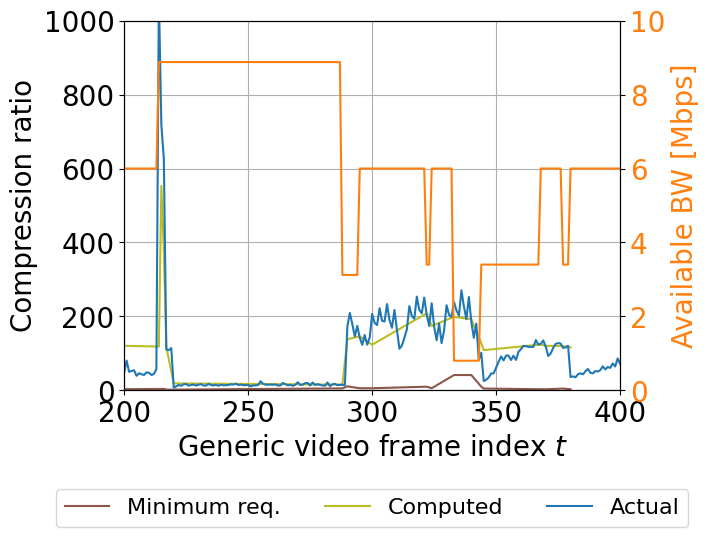

In [38]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Compression ratio')
# ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["target_cmp"].to_numpy(),color="tab:brown", label="Minimum req.")
ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["est_cmp"].to_numpy(),color="tab:olive", label="Computed")
ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["compression_ratio"].to_numpy(),color="tab:blue", label="Actual")
# plt.plot(cha_df["frame_id"].to_numpy(),raw_tensor_size*8/(cha_df["bandwidth"]*0.01),color="tab:purple",label="Limit")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["target_cmp"],color="tab:brown",label="Target(est)")
# plt.plot(cha_df["frame_id"].to_numpy(),cha_df["ratio"],color="tab:orange",label="CoTeD")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["ratio"],color="tab:blue",label="Static")
ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
ax1.set_xlim([200, 400])
ax1.set_ylim([0,1000])
ax2.set_ylim([0,10])
ax1.grid()
# plt.savefig("./images/jpeg_cmp_ratio.pdf", bbox_inches='tight')

# Bandwidth

Text(0, 0.5, 'Used BW [Mbps]')

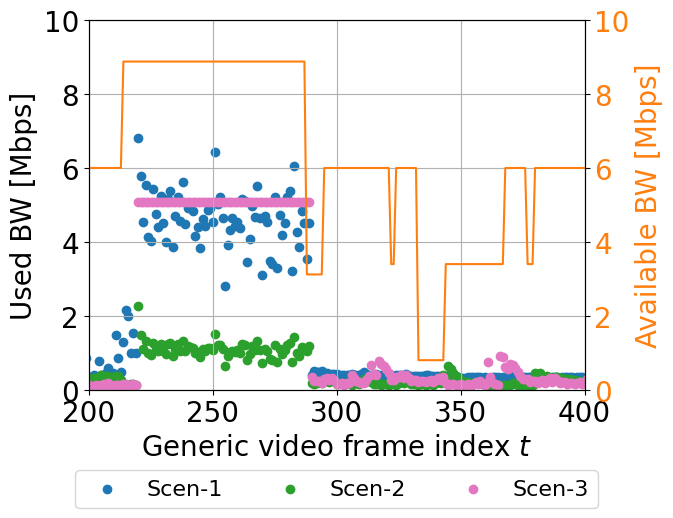

In [27]:
fig, ax1 = plt.subplots()
# feasibility = map_df["feasible"].to_numpy()
# for i in range(len(feasibility)):
#     if feasibility[i] == 1:
#         plt.axvspan(i, i+1, facecolor='tab:green', alpha=0.3)
#     else:
#         plt.axvspan(i, i+1, facecolor='tab:pink', alpha=0.3)

# ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6,color="tab:orange",label="Available")
ax1.scatter(cha_df["frame_id"].to_numpy(),jpeg_cha_df["consumed_bw"]/1e6,color="tab:blue",label="Scen-1")
ax1.scatter(cha_df["frame_id"].to_numpy(),cha_df["consumed_bw"]/1e6,color="tab:green",label="Scen-2")
ax1.scatter(cha_df["frame_id"].to_numpy(),no_cha_df["consumed_bw"]/1e6,color="tab:pink",label="Scen-3")
# plt.plot(static_cha_df["frame_id"].to_numpy(),(static_cha_df["datasize_real"]*8)/(1e6*0.01),color="tab:blue",label="Static")


ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(cha_df["frame_id"].to_numpy(),cha_df["bandwidth"]/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_xlim([200,400])
ax1.set_ylim([0,10])
ax2.set_ylim([0,10])
ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.35),fontsize=16)
ax1.grid()
ax1.set_xlabel("Generic video frame index $t$")
ax1.set_ylabel("Used BW [Mbps]")


# plt.autoscale(axis="x",tight=True)
# plt.savefig("../figures/bandwidth.pdf", bbox_inches='tight')

# SNR

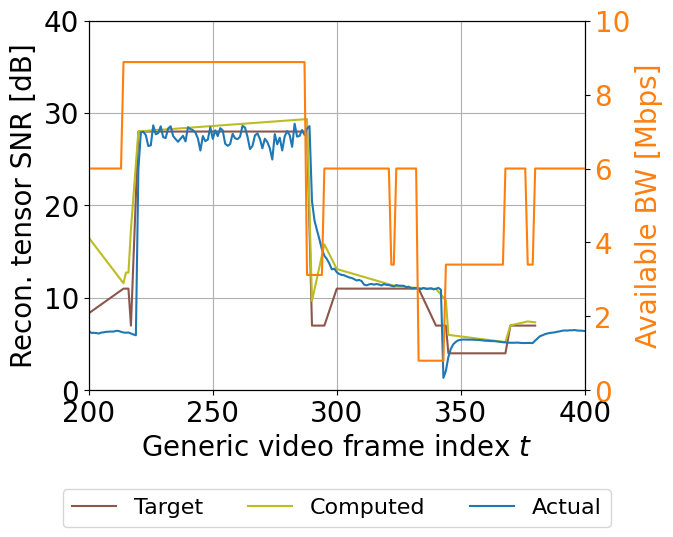

In [41]:

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Generic video frame index $t$')
ax1.set_ylabel('Recon. tensor SNR [dB]')
# ax1.tick_params(axis='y', labelcolor=color)

ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["target_snr"],color="tab:brown",label="Target")
ax1.plot(mag_df["frame_id"].to_numpy(),mag_df["est_snr"],color="tab:olive",label="Computed")
ax1.plot(cha_df["frame_id"].to_numpy(),cha_df["reconstruct_snr"],color="tab:blue",label="Actual")
# plt.plot(static_cha_df["frame_id"].to_numpy(),static_cha_df["reconstruct_snr"],color="tab:blue",label="Static")

ax2 = ax1.twinx() 
color = 'tab:orange'
ax2.set_ylabel('Available BW [Mbps]', color=color)  # we already handled the x-label with ax1
ax2.plot(map_df["frame_id"].to_numpy(),map_df["bandwidth"].to_numpy()/1e6, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(ncol=3,loc='lower center', bbox_to_anchor=(0.5, -0.4),fontsize=16)
ax1.set_xlim([200, 400])
ax1.set_ylim([0,40])
ax2.set_ylim([0,10])
ax1.grid()
# plt.autoscale(axis="x",tight=True)
# plt.savefig("./images/jpeg_snr.pdf", bbox_inches='tight')